# Import necessary modules and packages 📚

In [1]:
import os
import json
import numpy as np
import pandas as pd

In [2]:
# @title Download and unzip the data
import os, requests, zipfile

fname = 'task1_classic_classification.zip'
url = "https://data.caltech.edu/records/s0vdx-0k302/files/task1_classic_classification.zip?download=1"

if not os.path.isfile(fname):
    try:
        r = requests.get(url)
    except requests.ConnectionError:
        print("!!! Failed to download data !!!")
    else:
        if r.status_code != requests.codes.ok:
            print("!!! Failed to download data !!!")
    else:
        with open(fname, "wb") as fid:
            fid.write(r.content)
else:
    print('Data have already been downloaded!!!')

if not os.path.exists('task1_classic_classification'):
  # Unzip the file
  with zipfile.ZipFile(fname, 'r') as zip_ref:
    zip_ref.extractall('.')


# Download the script
fname = 'calms21_convert_to_npy.py'
url = "https://data.caltech.edu/records/s0vdx-0k302/files/calms21_convert_to_npy.py?download=1"

if not os.path.isfile(fname):
    try:
        r = requests.get(url)
    except requests.ConnectionError:
        print("!!! Failed to download data !!!")
    else:
        if r.status_code != requests.codes.ok:
            print("!!! Failed to download data !!!")
    else:
        with open(fname, "wb") as fid:
            fid.write(r.content)

Data have already been downloaded!!!


In [3]:
!python calms21_convert_to_npy.py  --input_directory '.' --output_directory '.'

Saving ./calms21_task1_test
Saving ./calms21_task1_train


In [4]:
def load_task1_data(data_path):
    """
    Load data for task 1:
      The vocaubulary tells you how to map behavior names to class ids;
      it is the same for all sequences in this dataset.
    """
    data_dict = np.load(data_path, allow_pickle=True).item()
    dataset = data_dict['annotator-id_0']
    # Get any sequence key.
    sequence_id = list(data_dict['annotator-id_0'].keys())[0]
    vocabulary = data_dict['annotator-id_0'][sequence_id]['metadata']['vocab']
    return dataset, vocabulary

In [5]:
training_data, vocab = load_task1_data('./calms21_task1_train.npy')
test_data, _ = load_task1_data('./calms21_task1_test.npy')

In [6]:
# As taken from Nora's notebook

sequence_names = list(training_data.keys())
sample_sequence_key = sequence_names[0]
single_sequence = training_data[sample_sequence_key]
sequence_names = list(training_data.keys())

data = []

#columns
mice = ['m1', 'm2']
coordinates = ['x', 'y']
bodyparts = ['nose', 'left_ear', 'right_ear', 'neck', 'left_hip', 'right_hip', 'tail_base']

print('We have ', len(sequence_names), ' sequences')
for sequence in sequence_names:

    for f, frame in enumerate(training_data[sequence]['keypoints']):
        tabdata = {}
        id = sequence + str(f)
        tabdata = {'sequence': sequence, 'frame': f, 'id': id}
       tabdata['label'] = training_data[sequence]['annotations'][f]

      # create a column for each mouse + coordinate + bodypart column
      for m, mouse in enumerate(frame):

        for c, coordinate in enumerate(mouse):

          for b, c_bodypart in enumerate(coordinate):

            column_name = mice[m] + '_' + coordinates[c] + '_' + bodyparts[b]
            tabdata[column_name] = c_bodypart

      data.append(tabdata)

print('We have ', len(data), ' frames in total in the dataset')

We have  70  sequences
We have  507738  frames in total in the dataset


In [7]:
df = pd.DataFrame(data)
df.head()

,sequence,frame,id,label,m1_x_nose,m1_x_left_ear,m1_x_right_ear,m1_x_neck,m1_x_left_hip,m1_x_right_hip,...,m2_x_left_hip,m2_x_right_hip,m2_x_tail_base,m2_y_nose,m2_y_left_ear,m2_y_right_ear,m2_y_neck,m2_y_left_hip,m2_y_right_hip,m2_y_tail_base
0,task1/train/mouse001_task1_annotator1,0,task1/train/mouse001_task1_annotator10,3,831.659204,805.659204,775.659204,780.659204,711.659204,711.659204,...,796.915924,840.915924,766.915924,253.216902,195.216902,193.216902,179.216902,152.216902,102.216902,97.216902
1,task1/train/mouse001_task1_annotator1,1,task1/train/mouse001_task1_annotator11,1,833.050439,809.050439,778.050439,783.050439,723.050439,717.050439,...,799.907019,846.907019,766.907019,259.539977,204.539977,201.539977,188.539977,153.539977,105.539977,98.539977
2,task1/train/mouse001_task1_annotator1,2,task1/train/mouse001_task1_annotator12,1,838.718976,816.718976,776.718976,787.718976,730.718976,713.718976,...,800.195703,860.195703,777.195703,256.902935,208.902935,205.902935,193.902935,150.902935,112.902935,99.902935
3,task1/train/mouse001_task1_annotator1,3,task1/train/mouse001_task1_annotator13,1,826.757507,815.757507,774.757507,785.757507,743.757507,711.757507,...,794.788861,856.788861,786.788861,263.420539,206.420539,206.420539,193.420539,147.420539,113.420539,97.420539
4,task1/train/mouse001_task1_annotator1,4,task1/train/mouse001_task1_annotator14,1,822.045709,812.045709,768.045709,779.045709,749.045709,709.045709,...,789.578644,862.578644,793.578644,263.366469,202.366469,201.366469,190.366469,143.366469,120.366469,95.366469


In [8]:
# Extract sequence as a numeric ID
df['sequence'] = df['sequence'].str[17:20].astype(int)

In [9]:
# Function to calculate the euclidean distance between two points
def euc_dist(x1, y1, x2, y2):
  return(np.sqrt((x2-x1)**2+(y2-y1)**2))

In [10]:
# Calculate the distance between the (matching) keypoints of the mice + an idea to capture the direction of their head along the neck-nose axis
df['nose_dist'] = euc_dist(df['m1_x_nose'], df['m2_y_nose'], df['m2_x_nose'], df['m2_y_nose'])
df['left_ear_dist'] = euc_dist(df['m1_x_left_ear'], df['m1_y_left_ear'], df['m2_x_left_ear'], df['m2_y_left_ear'])
df['right_ear_dist'] = euc_dist(df['m1_x_right_ear'], df['m1_y_right_ear'], df['m2_x_right_ear'], df['m2_y_right_ear'])
df['neck_dist'] = euc_dist(df['m1_x_neck'], df['m1_y_neck'], df['m2_x_neck'], df['m2_y_neck'])
df['left_hip_dist'] = euc_dist(df['m1_x_left_hip'], df['m1_y_left_hip'], df['m2_x_left_hip'], df['m2_y_left_hip'])
df['right_hip_dist'] = euc_dist(df['m1_x_right_hip'], df['m1_y_right_hip'], df['m2_x_right_hip'], df['m2_y_right_hip'])
df['tail_base_dist'] = euc_dist(df['m1_x_tail_base'], df['m1_y_tail_base'], df['m2_x_tail_base'], df['m2_y_tail_base'])
df['m1_head_direction_x'] = df['m1_x_nose'] - df['m1_x_neck']
df['m1_head_direction_y'] = df['m1_y_nose'] - df['m1_y_neck']
df['m2_head_direction_x'] = df['m2_x_nose'] - df['m2_x_neck']
df['m2_head_direction_y'] = df['m2_y_nose'] - df['m2_y_neck']

In [11]:
df = df[['sequence', 'label', 'nose_dist','left_ear_dist','right_ear_dist','neck_dist','left_hip_dist','right_hip_dist','tail_base_dist', 'm1_head_direction_x', 'm1_head_direction_y', 'm2_head_direction_x', 'm2_head_direction_y']]
df.head()

,sequence,label,nose_dist,left_ear_dist,right_ear_dist,neck_dist,left_hip_dist,right_hip_dist,tail_base_dist,m1_head_direction_x,m1_head_direction_y,m2_head_direction_x,m2_head_direction_y
0,1,3,25.256720,67.570641,122.301316,98.086090,152.712058,157.902950,174.623304,51.0,-23.0,-10.0,74.0
1,1,1,27.856580,61.256329,122.096154,96.199317,154.784440,156.504448,178.399768,50.0,-28.0,-9.0,71.0
2,1,1,21.476727,44.070032,121.076873,86.590587,152.682910,168.833268,187.001050,51.0,-46.0,-8.0,63.0
3,1,1,26.031354,32.897948,113.676966,75.212390,144.068404,167.966803,199.240273,41.0,-43.0,-4.0,70.0
4,1,1,30.532935,23.166260,110.924293,72.661399,141.041211,170.475533,202.077262,43.0,-37.0,4.0,73.0


In [12]:
# Sample from each interaction type a set of 1000 examples
df_interaction_samples = df.groupby("label").sample(n=1000, random_state=1).copy()

If we apply a principal component analysis and visualize the above matrix of distances using the first two components, we can see that the interaction type of 2 (*mount*) and 3 (*other*) have visisble clusters, where they appear to be distinct among the interaction types. Since we resticted the input data to different distances between the two mice, one could make the assumption, that for an interaction type of *mount*, the mice have to be closely located, while the interaction type of *other* covers probably the cases, where the mice are located far from each other and there is no clearly defined relation between them. However, the interaction type of 0 (attack), which is of our interest seems to be less separated.

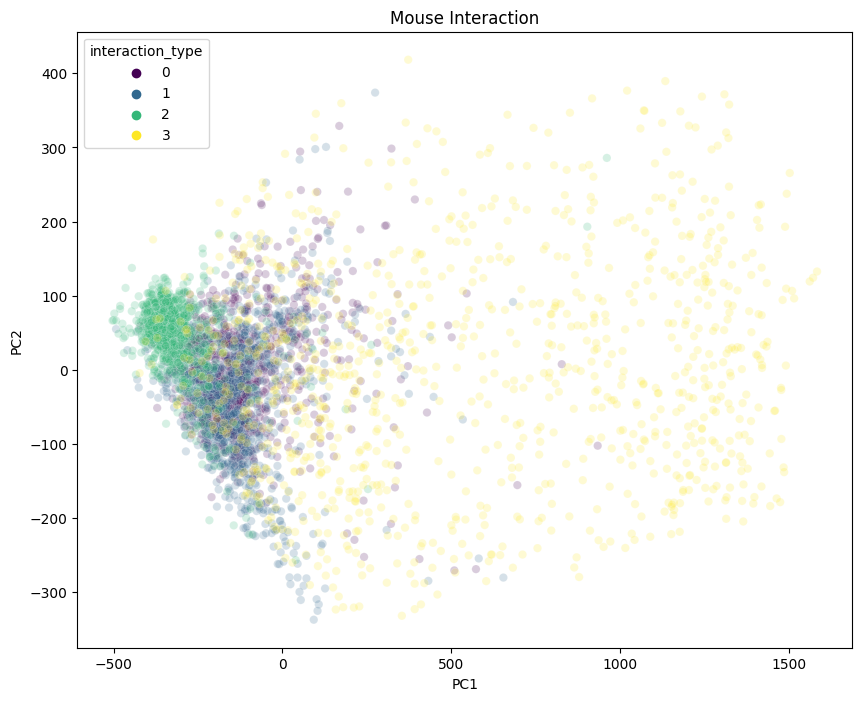

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
princomps = pca.fit_transform(df_interaction_samples.iloc[:,2:12])

# Combine embeddings with labels for visualization
princomps = pd.DataFrame(princomps, columns=['PC1', 'PC2'])
princomps['interaction_type'] = df_interaction_samples['label'].values

# Visualize the embeddings
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='interaction_type', data=princomps, palette='viridis', alpha = 0.2)
plt.title('Mouse Interaction')
plt.show()

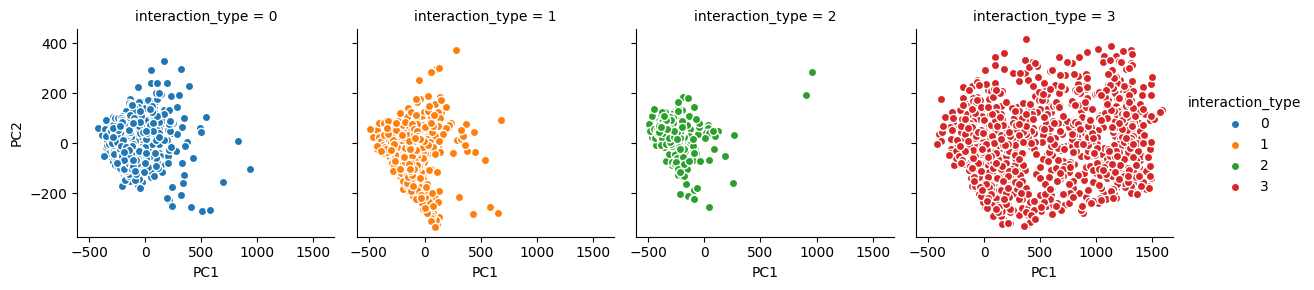

In [14]:
graph = sns.FacetGrid(princomps, col = "interaction_type", hue ="interaction_type")
graph.map(plt.scatter, "PC1", "PC2", edgecolor ="w").add_legend()
plt.show()

The previous assumptions are also supported by the mean distance measures grouped by the different interaction labels.

In [15]:
df.groupby('label').mean()

,sequence,nose_dist,left_ear_dist,right_ear_dist,neck_dist,left_hip_dist,right_hip_dist,tail_base_dist,m1_head_direction_x,m1_head_direction_y,m2_head_direction_x,m2_head_direction_y
label,,,,,,,,,,,,
0,32.633094,98.749968,138.721722,140.837464,135.664987,164.351956,169.136479,199.683876,-0.810813,1.980127,-0.620771,-2.820001
1,41.532667,78.592636,127.603026,129.475948,128.515098,173.422637,176.802220,219.729678,6.698728,8.033203,3.555462,-0.719640
2,27.516198,51.984171,77.154798,77.513069,74.493612,81.503985,83.064804,89.327091,-1.522279,6.621667,0.301765,6.916792
3,36.282919,342.689465,408.417463,410.310466,412.272686,427.661902,430.005905,442.846817,4.895158,8.244897,2.821666,-2.559364


In [16]:
# Take the attack label as a positive class
df['attack_label'] = np.where(df['label']== 0, 1, 0)

To train and evaluate a model, we do a cross-validation. As we would like to create a general model, that is preferably not too specific to the behaviour to the individual mice, we do the cross validation by training on the sequences of one set of mice and evaluate it on the sequences of a different set of mice.

In [17]:
from sklearn.linear_model import LogisticRegression

# Number of mice in the test/validation set
test_set_size = 10
mouse_count = len(df['sequence'].unique())
# How many folds should there be (the last might have slightly different size, depending on the settings)
folds = np.ceil(mouse_count/test_set_size).astype('int')

result = pd.DataFrame()

for i, v in enumerate(range(0, folds)):

  train = df[~df['sequence'].isin(range(i*test_set_size, (i+1)*test_set_size+1))].copy()
  test = df[df['sequence'].isin(range(i*test_set_size, (i+1)*test_set_size+1))].copy()

  logisticRegr = LogisticRegression()
  logisticRegr.fit(train.iloc[:,2:13], train['attack_label'])
  predictions = logisticRegr.predict_proba(test.iloc[:,2:13])

  test['prediction'] = predictions[:,1]
  result = pd.concat([result, test])

As an evaluation metric we take the ROC-Curve, comparing the true-positive and true-negative rates across different levels of cut-off values for the conversion from the predicted probabilities to binary classes - while also being more robust against the unbalanced classes in the dataset. Although the model is more successfull as a random one would be (AUC of 0.5), it is also not very impressive.

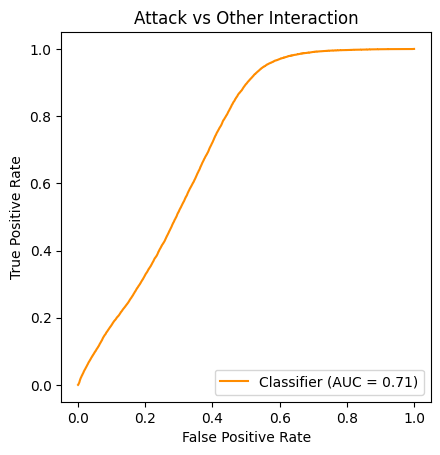

In [18]:
simport matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    result['attack_label'],
    result['prediction'],
    color="darkorange"
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Attack vs Other Interaction")
plt.legend()
plt.show()

As a comparison, the interaction type of mount has a much more promising prediction performance using our simplistic input based on the distance between the specific keypoints of the mice.

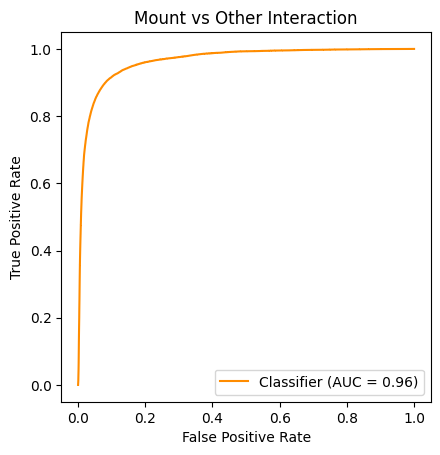

In [21]:

df['mount_label'] = np.where(df['label']== 2, 1, 0)

test_set_size = 10
mouse_count = len(df['sequence'].unique())
folds = np.ceil(mouse_count/test_set_size).astype('int')

result = pd.DataFrame()
for i, v in enumerate(range(0, folds)):
  train = df[~df['sequence'].isin(range(i*test_set_size, (i+1)*test_set_size+1))].copy()
  test = df[df['sequence'].isin(range(i*test_set_size, (i+1)*test_set_size+1))].copy()
  logisticRegr = LogisticRegression()
  logisticRegr.fit(train.iloc[:,2:13], train['mount_label'])
  predictions = logisticRegr.predict_proba(test.iloc[:,2:13])
  test['prediction'] = predictions[:,1]
  result = pd.concat([result, test])

RocCurveDisplay.from_predictions(
    result['mount_label'],
    result['prediction'],
    color="darkorange"
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Mount vs Other Interaction")
plt.legend()
plt.show()